In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

In [2]:
def kl_mvn(to, fr):
    """Calculate `KL(to||fr)`, where `to` and `fr` are pairs of means and covariance matrices"""
    m_to, S_to = to
    m_fr, S_fr = fr
    
    d = m_fr - m_to
    
    c, lower = scipy.linalg.cho_factor(S_fr)
    def solve(B):
        return scipy.linalg.cho_solve((c, lower), B)
    
    def logdet(S):
        return np.linalg.slogdet(S)[1]

    term1 = np.trace(solve(S_to))
    term2 = logdet(S_fr) - logdet(S_to)
    term3 = d.T @ solve(d)
    return (term1 + term2 + term3 - len(d))/2.

In [3]:
# n: number of samples, d: dimension
n = 1000
d = 10

In [4]:
# Generate A1, A2, B1, B2
# X ~ N(0, I), Y ~ N(0, I)
# Y1 = A1 X + B1, Y2 = A2 X + B2
seed = 1
np.random.seed(seed)

A1_vector = np.random.normal(0, 1, d)
A2_vector = np.random.normal(0, 1, d)
A1 = np.diag(A1_vector)
A2 = np.diag(A2_vector)

B1 = np.random.normal(0, 1, d)
B2 = np.random.normal(0, 1, d)







In [5]:
# compute - KL(p(Y)||p(Y1)) + KL(p(Y)||p(Y2))
mu = np.zeros(d)
sigma = np.diag(np.ones(d))

dist = -kl_mvn((mu, sigma), (B1, np.power(A1, 2))) + kl_mvn((mu, sigma), (B2, np.power(A2, 2)))
print(dist)

1078.4813746352945


In [6]:
# Generate 1000 data sets, compute estimator and variance
# X ~ N(0, I), Y ~ N(0, I)
# Y1 = A1 X + B1, Y2 = A2 X + B2

delta_list = []
std_list = []
for seed in range(1000):
    if seed % 100 == 0:
        print(seed)
    np.random.seed(seed)
    X = np.random.normal(0, 1, (n, d))
    Y1 = X * A1_vector + B1
    Y2 = X * A2_vector + B2
    Y = np.random.normal(0, 1, (n, d))

    g1_inverse = (Y - B1) / A1_vector
    g2_inverse = (Y - B2) / A2_vector
    d1 = d
    d2 = d

    delta_pp = np.log(np.abs(A2_vector / A1_vector)).sum() -0.5 * np.power(g1_inverse, 2).sum(1).mean() + 0.5 * np.power(g2_inverse, 2).sum(1).mean() + (d2 - d1) * np.log(2 * np.pi)
    std_pp = (-0.5 * np.power(g1_inverse, 2).sum(1) + 0.5 * np.power(g2_inverse, 2).sum(1)).std() / np.sqrt(n)

    delta_list.append(delta_pp)
    std_list.append(std_pp)


0
100
200
300
400
500
600
700
800
900


In [7]:
stat_list = (np.array(delta_list) - dist) / np.array(std_list)



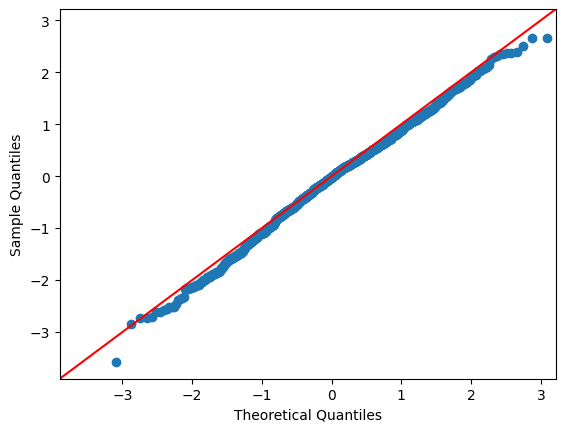

In [8]:
sm.qqplot(stat_list, line='45')
plt.savefig('qqplot.pdf')

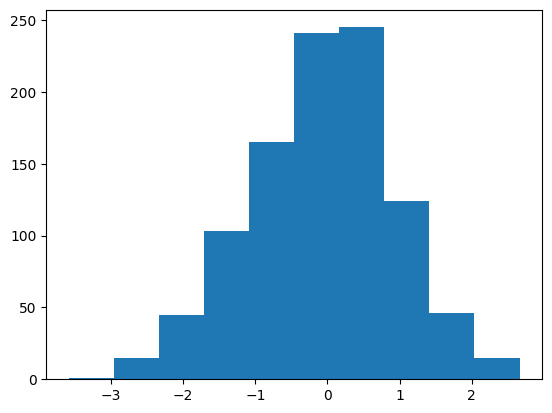

In [9]:
plt.hist(stat_list)
plt.savefig('histogram.pdf')